# Misc constraints

Astro & cosmo, beam dumps and Pb collisions, recast from $g_{a\gamma\gamma}$ bounds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import particle.literals
import numpy as np
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

In [2]:
me = particle.literals.e_minus.mass / 1e6 # TeV

# Astro and cosmo

In [3]:
#sn1987a = pd.read_csv('../data/astro_cosmo/SN1987.csv') #2107.12393

df_sn_gamma = pd.read_csv('SN1987A_gamma.txt', skiprows=4, sep='\t', names=['ma_eV', 'g_gamma']) #2304.01060
df_sn_nu = pd.read_csv('SN1987A_nu.txt', skiprows=3, sep='\t', names=['ma_eV', 'g_gamma']) #2201.09890
df_sn_pvo = pd.read_csv('SN1987A_PVO.txt', skiprows=2, sep='\t', names=['ma_eV', 'g_gamma']) #2303.11395
df_sne = pd.read_csv('SNe.txt', skiprows=3, sep='\t', names=['ma_eV', 'g_gamma']) #2201.09890
df_gw_fermi = pd.read_csv('GW170817_Fermi.txt', skiprows=3, sep='\t', names=['ma_eV', 'g_gamma']) #2305.01002
df_gw_fireball = pd.read_csv('GW170817_fireball.txt', skiprows=4, sep='\t', names=['ma_eV', 'g_gamma']) #2305.10327

In [4]:
# Trapping limit in 2204.11862

df_sn_nu['g_gamma'] = [min(g, 2e-6) for g in df_sn_nu['g_gamma']]
df_sne['g_gamma'] = [min(g, 2e-6) for g in df_sne['g_gamma']]

In [5]:
me = particle.literals.e_minus.mass/1000
mmu = particle.literals.mu_minus.mass/1000
mtau = particle.literals.tau_minus.mass/1000
mZ = particle.literals.Z_0.mass/1000
alpha_em = 1/137
s2W = 0.22339 #\sin^2\theta_W at tree level (=1-mW^2/mZ^2)
c2W = 1-s2W
Lambda = 1000

In [6]:
def Cgammagamma(ma, mlep, cgg0=0):
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    A1 = lambda x: x*(1-(x-1)*f(x)**2)
    c = cgg0
    for m in mlep:
        c += A1(4*m**2/ma**2)/m
    return -c*alpha_em/np.pi

Text(0, 0.5, '$|g_\\ell^\\phi|$')

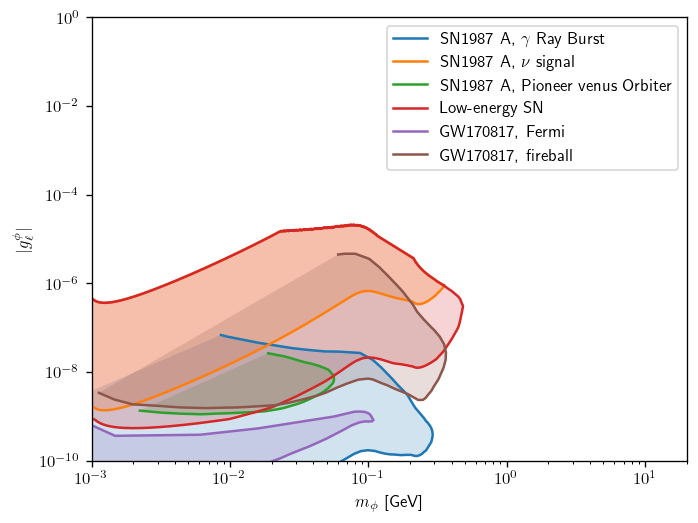

In [7]:
plt.figure(dpi=120)
plt.loglog(df_sn_gamma['ma_eV']*1e-9, [df_sn_gamma['g_gamma'][i]/np.abs(Cgammagamma(df_sn_gamma['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_gamma.index], label=r'SN1987 A, $\gamma$ Ray Burst')
plt.fill(df_sn_gamma['ma_eV']*1e-9, [df_sn_gamma['g_gamma'][i]/np.abs(Cgammagamma(df_sn_gamma['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_gamma.index], alpha=0.2)
plt.loglog(df_sn_nu['ma_eV']*1e-9, [df_sn_nu['g_gamma'][i]/np.abs(Cgammagamma(df_sn_nu['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_nu.index], label=r'SN1987 A, $\nu$ signal')
plt.fill(df_sn_nu['ma_eV']*1e-9, [df_sn_nu['g_gamma'][i]/np.abs(Cgammagamma(df_sn_nu['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_nu.index], alpha=0.2)
plt.loglog(df_sn_pvo['ma_eV']*1e-9, [df_sn_pvo['g_gamma'][i]/np.abs(Cgammagamma(df_sn_pvo['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_pvo.index], label='SN1987 A, Pioneer venus Orbiter')
plt.fill(df_sn_pvo['ma_eV']*1e-9, [df_sn_pvo['g_gamma'][i]/np.abs(Cgammagamma(df_sn_pvo['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_pvo.index], alpha=0.2)
plt.loglog(df_sne['ma_eV']*1e-9, [df_sne['g_gamma'][i]/np.abs(Cgammagamma(df_sne['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sne.index], label='Low-energy SN')
plt.fill(df_sne['ma_eV']*1e-9, [df_sne['g_gamma'][i]/np.abs(Cgammagamma(df_sne['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sne.index], alpha=0.2)
plt.loglog(df_gw_fermi['ma_eV']*1e-9, [df_gw_fermi['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fermi['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_gw_fermi.index], label='GW170817, Fermi')
plt.fill(df_gw_fermi['ma_eV']*1e-9, [df_gw_fermi['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fermi['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_gw_fermi.index], alpha=0.2)
plt.loglog(df_gw_fireball['ma_eV']*1e-9, [df_gw_fireball['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fireball['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_gw_fireball.index], label='GW170817, fireball')
plt.fill(df_gw_fireball['ma_eV']*1e-9, [df_gw_fireball['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fireball['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_gw_fireball.index], alpha=0.2)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(1e-3, 20)
plt.ylim(1e-10, 1)
plt.legend()
plt.xlabel(r'$m_\phi$ [GeV]')
plt.ylabel(r'$|g_\ell^\phi|$')

Text(0, 0.5, '$|g_\\tau^\\phi|$')

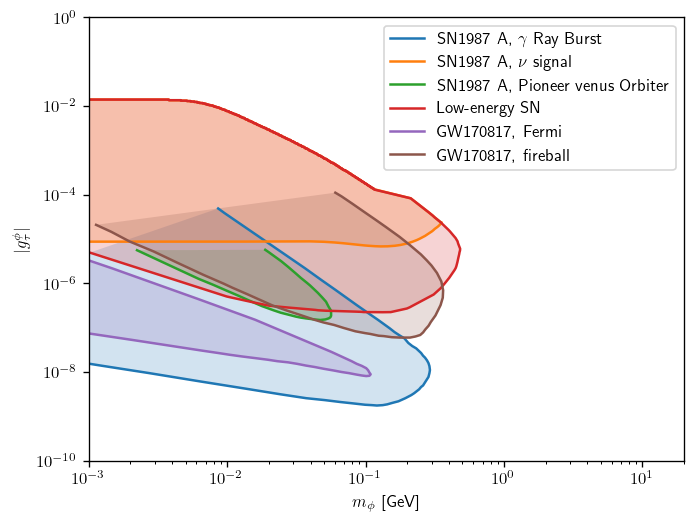

In [23]:
plt.figure(dpi=120)
plt.loglog(df_sn_gamma['ma_eV']*1e-9, [df_sn_gamma['g_gamma'][i]/np.abs(Cgammagamma(df_sn_gamma['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_gamma.index], label=r'SN1987 A, $\gamma$ Ray Burst')
plt.fill(df_sn_gamma['ma_eV']*1e-9, [df_sn_gamma['g_gamma'][i]/np.abs(Cgammagamma(df_sn_gamma['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_gamma.index], alpha=0.2)
plt.loglog(df_sn_nu['ma_eV']*1e-9, [df_sn_nu['g_gamma'][i]/np.abs(Cgammagamma(df_sn_nu['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_nu.index], label=r'SN1987 A, $\nu$ signal')
plt.fill(df_sn_nu['ma_eV']*1e-9, [df_sn_nu['g_gamma'][i]/np.abs(Cgammagamma(df_sn_nu['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_nu.index], alpha=0.2)
plt.loglog(df_sn_pvo['ma_eV']*1e-9, [df_sn_pvo['g_gamma'][i]/np.abs(Cgammagamma(df_sn_pvo['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_pvo.index], label='SN1987 A, Pioneer venus Orbiter')
plt.fill(df_sn_pvo['ma_eV']*1e-9, [df_sn_pvo['g_gamma'][i]/np.abs(Cgammagamma(df_sn_pvo['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_pvo.index], alpha=0.2)
plt.loglog(df_sne['ma_eV']*1e-9, [df_sne['g_gamma'][i]/np.abs(Cgammagamma(df_sne['ma_eV'][i]*1e-9, [mtau])) for i in df_sne.index], label='Low-energy SN')
plt.fill(df_sne['ma_eV']*1e-9, [df_sne['g_gamma'][i]/np.abs(Cgammagamma(df_sne['ma_eV'][i]*1e-9, [mtau])) for i in df_sne.index], alpha=0.2)
plt.loglog(df_gw_fermi['ma_eV']*1e-9, [df_gw_fermi['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fermi['ma_eV'][i]*1e-9, [mtau])) for i in df_gw_fermi.index], label='GW170817, Fermi')
plt.fill(df_gw_fermi['ma_eV']*1e-9, [df_gw_fermi['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fermi['ma_eV'][i]*1e-9, [mtau])) for i in df_gw_fermi.index], alpha=0.2)
plt.loglog(df_gw_fireball['ma_eV']*1e-9, [df_gw_fireball['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fireball['ma_eV'][i]*1e-9, [mtau])) for i in df_gw_fireball.index], label='GW170817, fireball')
plt.fill(df_gw_fireball['ma_eV']*1e-9, [df_gw_fireball['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fireball['ma_eV'][i]*1e-9, [mtau])) for i in df_gw_fireball.index], alpha=0.2)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(1e-3, 20)
plt.ylim(1e-10, 1)
plt.legend()
plt.xlabel(r'$m_\phi$ [GeV]')
plt.ylabel(r'$|g_\tau^\phi|$')

In [8]:
bounds = {'sn_gamma': df_sn_gamma, 'sn_nu': df_sn_nu, 'sn_pvo': df_sn_pvo, 'sne': df_sne, 'gw_fermi': df_gw_fermi, 'gw_fireball': df_gw_fireball}

for k, v in bounds.items():
    pd.DataFrame({'ma_GeV': v['ma_eV']*1e-9,
                 'gl': [v['g_gamma'][i]/np.abs(Cgammagamma(v['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in v.index],
                 'gtau': [v['g_gamma'][i]/np.abs(Cgammagamma(v['ma_eV'][i]*1e-9, [mtau])) for i in v.index]}).to_csv(f'../data/astro_cosmo/{k}.csv', index=False)
